In [1]:
# Проект e-commerce: вариант 1 
# Продакт-менеджер Василий попросил вас проанализировать совершенные покупки и ответить на следующие вопросы:

# 1. Сколько у нас пользователей, которые совершили покупку только один раз? (7 баллов) 

# 2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)? (5 баллов)

# 3. По каждому товару определить, в какой день недели товар чаще всего покупается. (5 баллов)

# 4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? 
# Не стоит забывать, что внутри месяца может быть не целое количество недель. 
# Например, в ноябре 2021 года 4,28 недели. 
# И внутри метрики это нужно учесть. (8 баллов) 

# 5. Используя pandas, проведи когортный анализ пользователей. 
# В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц. 
# Описание подхода можно найти тут. (10 баллов)

# 6. Часто для качественного анализа аудитории использую подходы, основанные на сегментации. 
# Используя python, построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию. 
# В кластеризации можешь выбрать следующие метрики: R - время от последней покупки пользователя до текущей даты, 
# F - суммарное количество покупок у пользователя за всё время, M - сумма покупок за всё время. 
# Подробно опиши, как ты создавал кластеры. Для каждого RFM-сегмента построй границы метрик recency, 
# frequency и monetary для интерпретации этих кластеров. 
# Пример такого описания: RFM-сегмент 132 (recency=1, frequency=3, monetary=2) имеет границы метрик recency от 130 до 500 дней, 
# frequency от 2 до 5 заказов в неделю, monetary от 1780 до 3560 рублей в неделю. Описание подхода можно найти тут. (35 баллов)

# Для решения задачи проведи предварительное исследование данных и сформулируй, 
# что должно считаться покупкой. Обосновать свой выбор ты можешь с помощью фактов оплат, 
# статусов заказов и других имеющихся данных.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import plotly.express as px

sns.set(
    font_scale  = 2,
    style       = 'whitegrid',
    rc          = {'figure.figsize' :(25,15)}
)

In [2]:
orders_df      = pd.read_csv('../PreFinalProject/olist_orders_dataset.csv')
order_items_df = pd.read_csv('../PreFinalProject/olist_order_items_dataset.csv')
customers_df   = pd.read_csv('../PreFinalProject/olist_customers_dataset.csv')

In [3]:
#Посмотрим на данные

In [4]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [5]:
orders_df.head(3)

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   

  order_estimated_delivery_date  
0           2017-10-18 00:00:00  
1           2018-08-13 00:00:00  
2           2018-09-04 00:00:00

In [6]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [7]:
order_items_df.head(3)

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   

   shipping_limit_date  price  freight_value  
0  2017-09-19 09:45:35   58.9          13.29  
1  2017-05-03 11:05:13  239.9          19.93  
2  2018-01-18 14:48:30  199.0          17.87

In [8]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [9]:
customers_df.head(3)

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP

In [10]:
#Преобразуем типы данных 

In [11]:
orders_df = orders_df.astype({'order_delivered_carrier_date'  : 'datetime64', 
                              'order_delivered_customer_date' : 'datetime64',
                              'order_estimated_delivery_date' : 'datetime64',
                              'order_purchase_timestamp' : 'datetime64',
                              'order_approved_at':'datetime64'})

In [12]:
#№1 Посмотрим возможные статусы заказа

In [13]:
orders_df.order_status.unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [14]:
# На мой взгляд, покупку можно считать совершонной, если статус заказа принимает значение 'delivered'.
# Отберём такие данные. Перед этим объеденим данные

In [15]:
unique_id_df = orders_df.merge(customers_df, on = 'customer_id', how = 'left')

In [16]:
unique_id_df = unique_id_df\
              .query("order_status == 'delivered'")\
              .groupby('customer_unique_id', as_index = False)\
              .agg({'order_id':'count'})\
              .query("order_id == 1")

In [17]:
#Посчитаем колличество уникальных id покупателей

In [18]:
unique_id_df.customer_unique_id.nunique()

90557

In [19]:
#90557 пользователей совершили покупку только один раз.

In [20]:
# №2
# Отберём все заказы, которые не доставлены. Сгрупперуем и посчитаем колличество отменённых 
# заказов по месяцам. Теперь сгруппируем по причинам и посчитаем среднее значение.

In [21]:
avg_cancel_orders = orders_df.query('order_status != "delivered"')\
    .groupby([pd.Grouper(freq='MS', key='order_purchase_timestamp'),'order_status'],as_index=False) \
    .agg({'order_id':'count'})\
    .groupby('order_status',as_index=False)\
    .agg({'order_id':'mean'}) \
    .rename(columns={'order_id':'avg_value'})

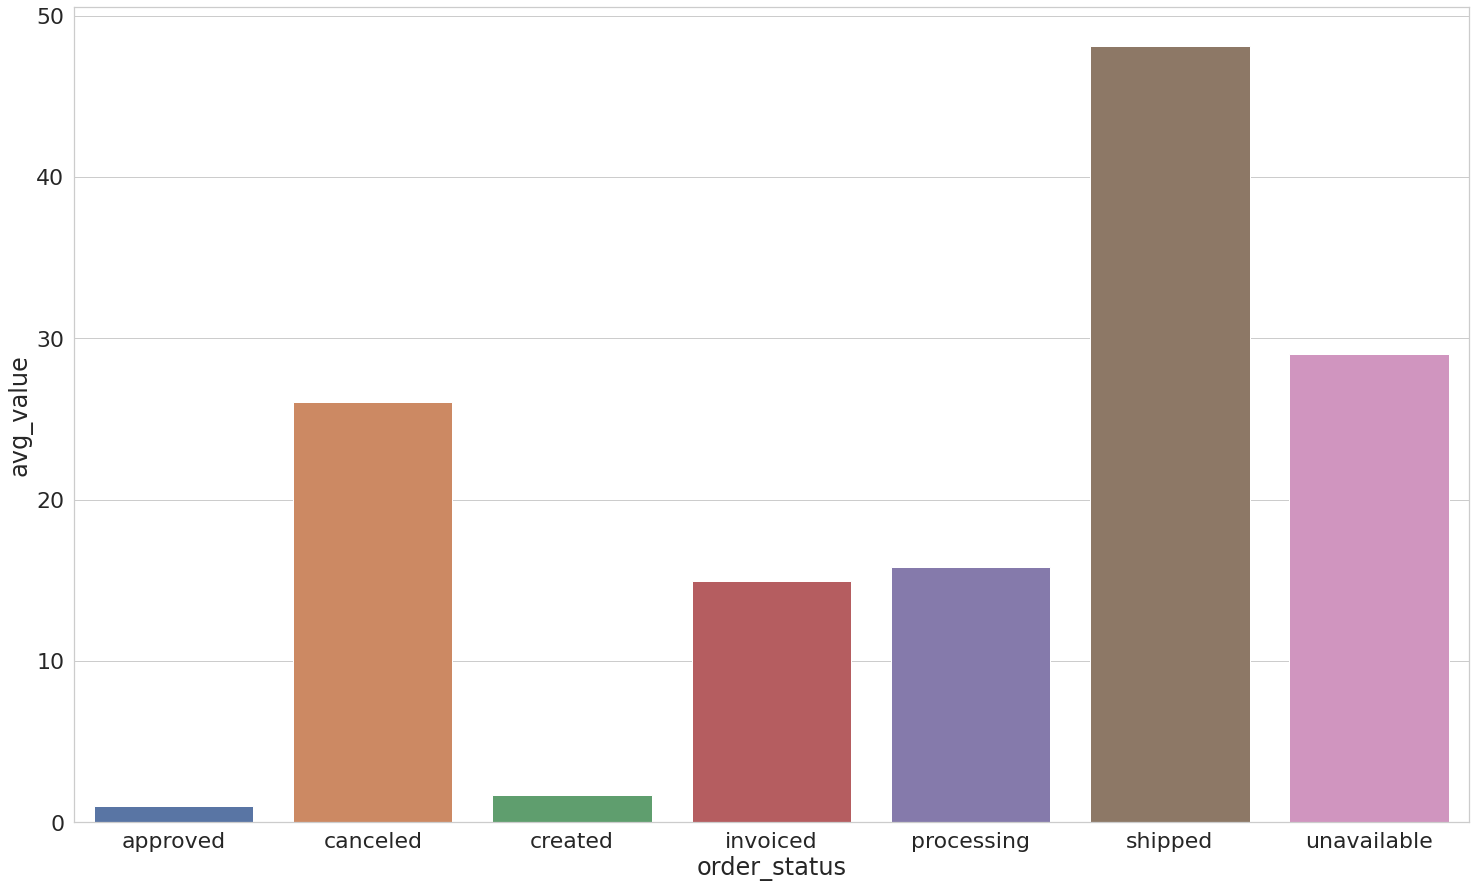

In [22]:
sns.barplot(data=avg_cancel_orders, x = 'order_status', y = 'avg_value')

№3
Объеденим нужные датафреймы
Найдём день недели по дате 
Удалим пропуски
Сгрупперуем заказы по дням недели и посчитаем их колличество для каждого заказа

In [23]:
orders_items = orders_df.merge(order_items_df, 
                               how = 'left', 
                               on = 'order_id')[['product_id', 
                                                 'order_purchase_timestamp', 
                                                 'order_status']]

In [24]:
orders_items['order_purchase_timestamp'] = orders_items['order_purchase_timestamp'].dt.day_name()

In [25]:
orders_items = orders_items.dropna()

In [26]:
orders_by_day = orders_items.query('order_status == "delivered"')\
            .groupby(['product_id', 'order_purchase_timestamp'], as_index = False)\
            .agg({'order_status':'count'})\
            .drop_duplicates(subset=["product_id"], keep='first')\
            .rename(columns={'order_purchase_timestamp':'purchase_day', 
                             'order_status':'order_count'})

In [27]:
#№4

In [28]:
unique_id_df = orders_df.merge(customers_df, on = 'customer_id', how = 'left')

In [29]:
unique_id_df.order_purchase_timestamp = orders_df.order_purchase_timestamp.dt.month_name()

In [30]:
unique_id_df[['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'customer_unique_id']]

order_id                       customer_id  \
0      e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1      53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2      47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3      949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4      ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
...                                 ...                               ...   
99436  9c5dedf39a927c1b2549525ed64a053c  39bd1228ee8140590ac3aca26f2dfe00   
99437  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
99438  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
99439  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
99440  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

      order_status order_purchase_timestamp                customer_unique_id  
0        delivered                  October  7c396fd4830fd04220f754e42b4e5bff  
1        delivered                     July  af07308b275d755c9edb36a90c618231  
2        delivered                   August  3a653a41f6f9fc3d2a113cf8398680e8  
3        delivered                 November  7c142cf63193a1473d2e66489a9ae977  
4        delivered                 February  72632f0f9dd73dfee390c9b22eb56dd6  
...            ...                      ...                               ...  
99436    delivered                    March  6359f309b166b0196dbf7ad2ac62bb5a  
99437    delivered                 February  da62f9e57a76d978d02ab5362c509660  
99438    delivered                   August  737520a9aad80b3fbbdad19b66b37b30  
99439    delivered                  January  5097a5312c8b157bb7be58ae360ef43c  
99440    delivered                    March  60350aa974b26ff12caad89e55993bd6  

[99441 rows x 5 columns]

In [31]:
unique_id_df['week'] = orders_df.order_purchase_timestamp.dt.days_in_month / 7

In [32]:
unique_id_df = unique_id_df.drop(['order_purchase_timestamp'], axis = 1)

In [33]:
customers_by_month = unique_id_df.query('order_status == "delivered"')\
    .groupby(['customer_unique_id','week'], as_index=False)\
    .agg({'order_status':'count'})\
    .groupby(['customer_unique_id','week'],as_index=False)\
    .agg({'order_status':'sum'})\
    .rename(columns={'order_status':'sum_orders'}) 

In [34]:
customers_by_month.sum_orders = customers_by_month.sum_orders/customers_by_month.week

In [35]:
customers_by_month = customers_by_month.rename(columns={'order_status':'avg_orders'})

In [36]:
customers_by_month.head(3)

customer_unique_id      week  sum_orders
0  0000366f3b9a7992bf8c76cfdf3221e2  4.428571    0.225806
1  0000b849f77a49e4a4ce2b2a4ca5be3f  4.428571    0.225806
2  0000f46a3911fa3c0805444483337064  4.428571    0.225806

In [37]:
#№5


In [38]:
unique_id_df = orders_df.merge(customers_df, on = 'customer_id', how = 'inner')
unique_id_df.head(3)

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   

  order_status order_purchase_timestamp   order_approved_at  \
0    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   

  order_estimated_delivery_date                customer_unique_id  \
0                    2017-10-18  7c396fd4830fd04220f754e42b4e5bff   
1                    2018-08-13  af07308b275d755c9edb36a90c618231   
2                    2018-09-04  3a653a41f6f9fc3d2a113cf8398680e8   

   customer_zip_code_prefix customer_city customer_state  
0                      3149     sao paulo             SP  
1                     47813     barreiras             BA  
2                     75265    vianopolis             GO

In [39]:
unique_id_delivered = unique_id_df[unique_id_df['order_status'] == 'delivered']


In [40]:
unique_id_delivered.order_purchase_timestamp = unique_id_delivered.order_purchase_timestamp.dt.to_period('M')


/opt/tljh/user/lib/python3.7/site-packages/pandas/core/generic.py:5165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [41]:
unique_id_delivered = unique_id_delivered[['customer_unique_id','order_id','order_purchase_timestamp']]
unique_id_delivered = unique_id_delivered.sort_values('order_purchase_timestamp')
unique_id_delivered.head()

customer_unique_id                          order_id  \
30710  830d5b7aaa3b6f1e9ad63703bec97d23  bfbd0f9bdef84302105ad712db648a6c   
40692  2e15add79c76241beffe812a24ad3a31  cb29497c3782a76b57327c055d58b0e0   
24708  d6a930873ee3f80aa823cb1d4baca58d  0ca768c507d1fc3c61bd950bb1c5231a   
94421  f7ace36f8a10c4b2ede9ea7708e01454  2e8e21db96a8ab922e51cd297678c6b2   
53268  4a6959f9a4aca95bb3733032d0a50c9e  25f680bf746bec3df11d48318ff015de   

      order_purchase_timestamp  
30710                  2016-09  
40692                  2016-10  
24708                  2016-10  
94421                  2016-10  
53268                  2016-10

In [42]:
first_date = unique_id_delivered.groupby('customer_unique_id',as_index=False) \
    .agg({'order_purchase_timestamp':'first'})
first_date.head()

customer_unique_id order_purchase_timestamp
0  0000366f3b9a7992bf8c76cfdf3221e2                  2018-05
1  0000b849f77a49e4a4ce2b2a4ca5be3f                  2018-05
2  0000f46a3911fa3c0805444483337064                  2017-03
3  0000f6ccb0745a6a4b88665a16c9f078                  2017-10
4  0004aac84e0df4da2b147fca70cf8255                  2017-11

In [43]:
unique_id_delivered = unique_id_delivered.merge(first_date, how='inner',on='customer_unique_id')


In [44]:
unique_id_delivered = unique_id_delivered \
.rename(columns={'order_purchase_timestamp_x':'order_date','order_purchase_timestamp_y':'first_order_date'})
unique_id_delivered.head()

customer_unique_id                          order_id  \
0  830d5b7aaa3b6f1e9ad63703bec97d23  bfbd0f9bdef84302105ad712db648a6c   
1  2e15add79c76241beffe812a24ad3a31  cb29497c3782a76b57327c055d58b0e0   
2  d6a930873ee3f80aa823cb1d4baca58d  0ca768c507d1fc3c61bd950bb1c5231a   
3  f7ace36f8a10c4b2ede9ea7708e01454  2e8e21db96a8ab922e51cd297678c6b2   
4  4a6959f9a4aca95bb3733032d0a50c9e  25f680bf746bec3df11d48318ff015de   

  order_date first_order_date  
0    2016-09          2016-09  
1    2016-10          2016-10  
2    2016-10          2016-10  
3    2016-10          2016-10  
4    2016-10          2016-10

In [45]:
unique_id_delivered = unique_id_delivered.groupby(['first_order_date','order_date']) \
    .agg({'customer_unique_id':'count'})

In [46]:
unique_id_delivered

customer_unique_id
first_order_date order_date                    
2016-09          2016-09                      1
2016-10          2016-10                    265
                 2017-04                      1
                 2017-07                      1
                 2017-09                      1
...                                         ...
2018-06          2018-07                     25
                 2018-08                     16
2018-07          2018-07                   6007
                 2018-08                     31
2018-08          2018-08                   6180

[219 rows x 1 columns]

In [47]:
def cohort_period(df):
    df['cohort_period'] = np.arange(len(df)) + 1
    return df

unique_id_delivered = unique_id_delivered.groupby(level=0).apply(cohort_period)
unique_id_delivered.head()

customer_unique_id  cohort_period
first_order_date order_date                                   
2016-09          2016-09                      1              1
2016-10          2016-10                    265              1
                 2017-04                      1              2
                 2017-07                      1              3
                 2017-09                      1              4

In [48]:
unique_id_delivered = unique_id_delivered \
.pivot_table(columns='cohort_period', index = 'first_order_date',values='customer_unique_id')

In [49]:
base = unique_id_delivered[1]


In [50]:
retention = unique_id_delivered.divide(base, axis=0).round(4) 

In [51]:
retention[retention[3] == retention[3].max()].index


PeriodIndex(['2017-09'], dtype='period[M]', name='first_order_date', freq='M')

In [52]:
pd.PeriodIndex(['2017-09'], dtype='period[M]', name='first_order_date', freq='M')

PeriodIndex(['2017-09'], dtype='period[M]', name='first_order_date', freq='M')

In [53]:
retention

cohort_period      1       2       3       4       5       6       7       8   \
first_order_date                                                                
2016-09           1.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2016-10           1.0  0.0038  0.0038  0.0038  0.0038  0.0038  0.0038  0.0075   
2016-12           1.0  1.0000     NaN     NaN     NaN     NaN     NaN     NaN   
2017-01           1.0  0.0027  0.0027  0.0013  0.0040  0.0013  0.0040  0.0013   
2017-02           1.0  0.0018  0.0030  0.0012  0.0042  0.0012  0.0024  0.0018   
2017-03           1.0  0.0047  0.0035  0.0047  0.0035  0.0016  0.0016  0.0031   
2017-04           1.0  0.0066  0.0026  0.0022  0.0026  0.0026  0.0039  0.0031   
2017-05           1.0  0.0048  0.0045  0.0028  0.0028  0.0034  0.0045  0.0014   
2017-06           1.0  0.0052  0.0042  0.0042  0.0032  0.0039  0.0036  0.0023   
2017-07           1.0  0.0058  0.0034  0.0024  0.0034  0.0021  0.0031  0.0010   
2017-08           1.0  0.0070  0.0039  0.0027  0.0034  0.0056  0.0029  0.0027   
2017-09           1.0  0.0069  0.0054  0.0037  0.0044  0.0032  0.0022  0.0025   
2017-10           1.0  0.0075  0.0025  0.0009  0.0025  0.0021  0.0021  0.0039   
2017-11           1.0  0.0059  0.0038  0.0017  0.0017  0.0020  0.0013  0.0018   
2017-12           1.0  0.0020  0.0030  0.0037  0.0026  0.0020  0.0017  0.0002   
2018-01           1.0  0.0033  0.0036  0.0029  0.0029  0.0017  0.0017  0.0023   
2018-02           1.0  0.0034  0.0040  0.0030  0.0025  0.0022  0.0020     NaN   
2018-03           1.0  0.0039  0.0034  0.0031  0.0012  0.0012     NaN     NaN   
2018-04           1.0  0.0059  0.0030  0.0024  0.0015     NaN     NaN     NaN   
2018-05           1.0  0.0053  0.0026  0.0018     NaN     NaN     NaN     NaN   
2018-06           1.0  0.0042  0.0027     NaN     NaN     NaN     NaN     NaN   
2018-07           1.0  0.0052     NaN     NaN     NaN     NaN     NaN     NaN   
2018-08           1.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

cohort_period         9       10      11      12      13      14      15  \
first_order_date                                                           
2016-09              NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2016-10           0.0075     NaN     NaN     NaN     NaN     NaN     NaN   
2016-12              NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2017-01           0.0013  0.0040  0.0013  0.0067  0.0040  0.0013  0.0013   
2017-02           0.0012  0.0018  0.0012  0.0030  0.0012  0.0018  0.0012   
2017-03           0.0031  0.0008  0.0035  0.0012  0.0020  0.0012  0.0016   
2017-04           0.0031  0.0018  0.0026  0.0009  0.0004  0.0004  0.0009   
2017-05           0.0026  0.0031  0.0026  0.0034  0.0023  0.0003  0.0017   
2017-06           0.0013  0.0019  0.0029  0.0039  0.0016  0.0019  0.0032   
2017-07           0.0021  0.0029  0.0021  0.0031  0.0013  0.0024     NaN   
2017-08           0.0015  0.0015  0.0024  0.0019  0.0012     NaN     NaN   
2017-09           0.0027  0.0017  0.0025  0.0007     NaN     NaN     NaN   
2017-10           0.0030  0.0018  0.0021     NaN     NaN     NaN     NaN   
2017-11           0.0013  0.0006     NaN     NaN     NaN     NaN     NaN   
2017-12           0.0019     NaN     NaN     NaN     NaN     NaN     NaN   
2018-01              NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2018-02              NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2018-03              NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2018-04              NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2018-05              NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2018-06              NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2018-07              NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2018-08              NaN     NaN     NaN     NaN     NaN     NaN     NaN   

cohort_period         16      17      18  
first_order_date              

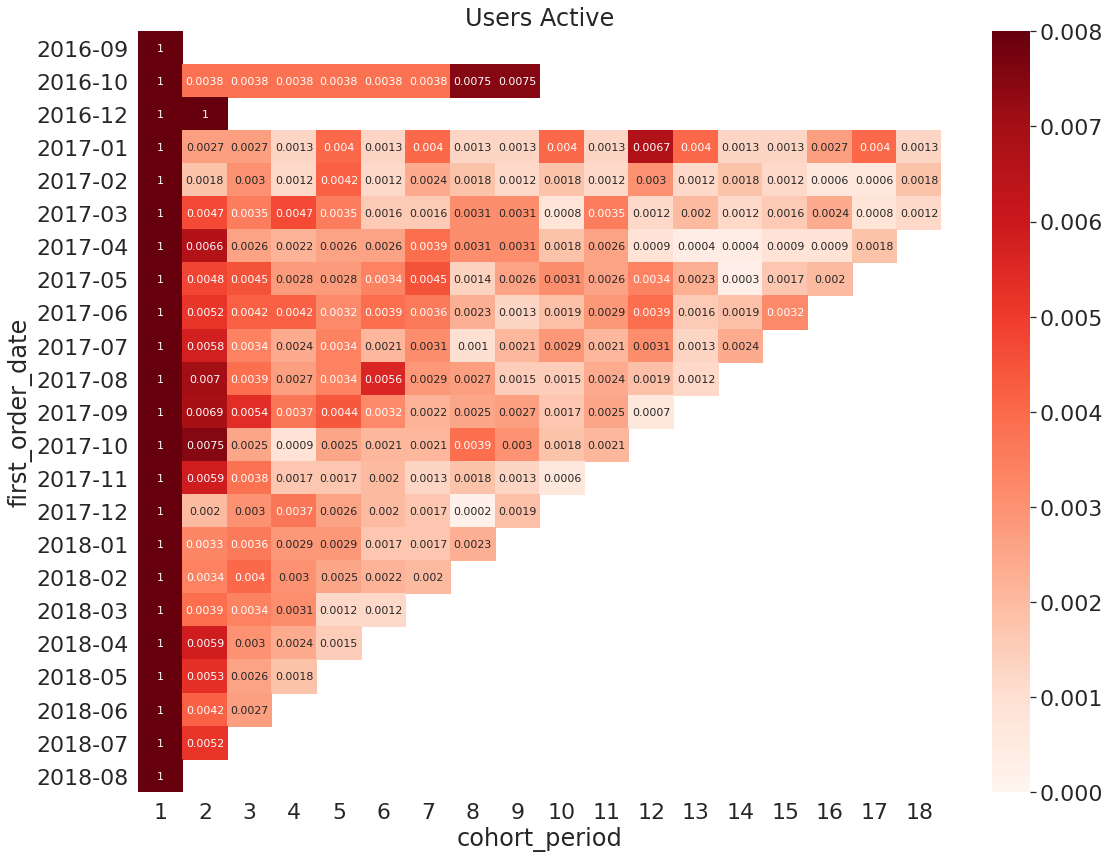

In [54]:
plt.rcParams['font.size'] = '11'
plt.figure(figsize=(18,14))
plt.title('Users Active')
ax = sns.heatmap(data=retention, annot=True, vmin=0.0,vmax=0.008 ,cmap='Reds')
ax.set_yticklabels(retention.index)
fig=ax.get_figure()
fig.savefig("Retention Counts.png")

plt.show()

In [56]:
orders_uniq_rfm = orders_df.merge(customers_df, on='customer_id', how='left')
orders_uniq_id_rfm = orders_uniq_rfm.merge(order_items_df, how='left', on='order_id')
orders_uniq_id_rfm.head()
# мерджим датафреймы

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp   order_approved_at  \
0    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06 2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39 2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date                customer_unique_id  \
0                    2017-10-18  7c396fd4830fd04220f754e42b4e5bff   
1                    2018-08-13  af07308b275d755c9edb36a90c618231   
2                    2018-09-04  3a653a41f6f9fc3d2a113cf8398680e8   
3                    2017-12-15  7c142cf63193a1473d2e66489a9ae977   
4                    2018-02-26  72632f0f9dd73dfee390c9b22eb56dd6   

   customer_zip_code_prefix            customer_city customer_state  \
0                      3149                sao paulo             SP   
1                     47813                barreiras             BA   
2                     75265               vianopolis             GO   
3                     59296  sao goncalo do amarante             RN   
4                      9195              santo andre             SP   

   order_item_id                        product_id  \
0            1.0  87285b34884572647811a353c7ac498a   
1            1.0  595fac2a385ac33a80bd5114aec74eb8   
2            1.0  aa4383b373c6aca5d8797843e5594415   
3            1.0  d0b61bfb1de832b15ba9d266ca96e5b0   
4            1.0  65266b2da20d04dbe00c5c2d3bb7859e   

                          seller_id  shipping_limit_date   price  \
0  3504c0cb71d7fa48d967e0e4c94d59d9  2017-10-06 11:07:15   29.99   
1  289cdb325fb7e7f891c38608bf9e0962  2018-07-30 03:24:27  118.70   
2  4869f7a5dfa277a7dca6462dcf3b52b2  2018-08-13 08:55:23  159.90   
3  66922902710d126a0e7d26b0e3805106  2017-11-23 19:45:59   45.00   
4  2c9e548be18521d1c43cde1c582c6de8  2018-02-19 20:31:37   19.90   

   freight_value  
0           8.72  
1          22.76  
2          19.22  
3          27.20  
4           8.72

In [57]:
orders_uniq_id_rfm = orders_uniq_id_rfm[orders_uniq_id_rfm.order_status == 'delivered']


In [58]:
orders_uniq_id_RFM = orders_uniq_id_rfm[['customer_unique_id','order_id','order_purchase_timestamp','price']]
orders_uniq_id_RFM.head()
# оставляем необходимые коллонки

customer_unique_id                          order_id  \
0  7c396fd4830fd04220f754e42b4e5bff  e481f51cbdc54678b7cc49136f2d6af7   
1  af07308b275d755c9edb36a90c618231  53cdb2fc8bc7dce0b6741e2150273451   
2  3a653a41f6f9fc3d2a113cf8398680e8  47770eb9100c2d0c44946d9cf07ec65d   
3  7c142cf63193a1473d2e66489a9ae977  949d5b44dbf5de918fe9c16f97b45f8a   
4  72632f0f9dd73dfee390c9b22eb56dd6  ad21c59c0840e6cb83a9ceb5573f8159   

  order_purchase_timestamp   price  
0      2017-10-02 10:56:33   29.99  
1      2018-07-24 20:41:37  118.70  
2      2018-08-08 08:38:49  159.90  
3      2017-11-18 19:28:06   45.00  
4      2018-02-13 21:18:39   19.90

In [59]:
orders_uniq_id_RFM.order_purchase_timestamp = pd.to_datetime(orders_uniq_id_RFM.order_purchase_timestamp)
# переводим дату в нужный формат

/opt/tljh/user/lib/python3.7/site-packages/pandas/core/generic.py:5165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [60]:
orders_uniq_id_RFM['time_delta'] = orders_uniq_id_RFM.order_purchase_timestamp \
    - orders_uniq_id_RFM.order_purchase_timestamp.max()
orders_uniq_id_RFM.head()
# считаем разницу между датой нынешней и датой последнего заказа

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


customer_unique_id                          order_id  \
0  7c396fd4830fd04220f754e42b4e5bff  e481f51cbdc54678b7cc49136f2d6af7   
1  af07308b275d755c9edb36a90c618231  53cdb2fc8bc7dce0b6741e2150273451   
2  3a653a41f6f9fc3d2a113cf8398680e8  47770eb9100c2d0c44946d9cf07ec65d   
3  7c142cf63193a1473d2e66489a9ae977  949d5b44dbf5de918fe9c16f97b45f8a   
4  72632f0f9dd73dfee390c9b22eb56dd6  ad21c59c0840e6cb83a9ceb5573f8159   

  order_purchase_timestamp   price          time_delta  
0      2017-10-02 10:56:33   29.99 -332 days +19:55:56  
1      2018-07-24 20:41:37  118.70  -36 days +05:41:00  
2      2018-08-08 08:38:49  159.90  -22 days +17:38:12  
3      2017-11-18 19:28:06   45.00 -284 days +04:27:29  
4      2018-02-13 21:18:39   19.90 -197 days +06:18:02

In [61]:
orders_uniq_id_RFM['r_score'] = pd.qcut(orders_uniq_id_RFM['time_delta'],q = [0,0.8,0.9,1] , labels=[1,2,3])
# сегментируем r-score поделив на 3 значения до 30 дней, до 96 дней, более 96 дней
orders_uniq_id_RFM.head()

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


customer_unique_id                          order_id  \
0  7c396fd4830fd04220f754e42b4e5bff  e481f51cbdc54678b7cc49136f2d6af7   
1  af07308b275d755c9edb36a90c618231  53cdb2fc8bc7dce0b6741e2150273451   
2  3a653a41f6f9fc3d2a113cf8398680e8  47770eb9100c2d0c44946d9cf07ec65d   
3  7c142cf63193a1473d2e66489a9ae977  949d5b44dbf5de918fe9c16f97b45f8a   
4  72632f0f9dd73dfee390c9b22eb56dd6  ad21c59c0840e6cb83a9ceb5573f8159   

  order_purchase_timestamp   price          time_delta r_score  
0      2017-10-02 10:56:33   29.99 -332 days +19:55:56       1  
1      2018-07-24 20:41:37  118.70  -36 days +05:41:00       3  
2      2018-08-08 08:38:49  159.90  -22 days +17:38:12       3  
3      2017-11-18 19:28:06   45.00 -284 days +04:27:29       1  
4      2018-02-13 21:18:39   19.90 -197 days +06:18:02       1

In [64]:
orders_uniq_id = orders_df.merge(customers_df, on='customer_id', how='left') 
orders_uniq_id.head()
# мерджим результат r-score к итоговой коллонке

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp   order_approved_at  \
0    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06 2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39 2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date                customer_unique_id  \
0                    2017-10-18  7c396fd4830fd04220f754e42b4e5bff   
1                    2018-08-13  af07308b275d755c9edb36a90c618231   
2                    2018-09-04  3a653a41f6f9fc3d2a113cf8398680e8   
3                    2017-12-15  7c142cf63193a1473d2e66489a9ae977   
4                    2018-02-26  72632f0f9dd73dfee390c9b22eb56dd6   

   customer_zip_code_prefix            customer_city customer_state  
0                      3149                sao paulo             SP  
1                     47813                barreiras             BA  
2                     75265               vianopolis             GO  
3                     59296  sao goncalo do amarante             RN  
4                      9195              santo andre             SP

In [65]:
x = orders_uniq_id.loc[orders_uniq_id['order_status'] == 'delivered'] \
    .groupby('customer_unique_id',as_index=False) \
    .agg({'order_id':'count'})
x.head()
# считаем кол-во выполненых заказов для каждого пользователя

customer_unique_id  order_id
0  0000366f3b9a7992bf8c76cfdf3221e2         1
1  0000b849f77a49e4a4ce2b2a4ca5be3f         1
2  0000f46a3911fa3c0805444483337064         1
3  0000f6ccb0745a6a4b88665a16c9f078         1
4  0004aac84e0df4da2b147fca70cf8255         1

In [66]:
orders_uniq_id_RFM.customer_unique_id = orders_uniq_id_RFM.customer_unique_id.drop_duplicates()
# убираем дупликаты

/opt/tljh/user/lib/python3.7/site-packages/pandas/core/generic.py:5165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [67]:
orders_uniq_id_RFM = orders_uniq_id_RFM.dropna()
# убираем пропущенные данные

In [68]:
orders_uniq_id_RFM = orders_uniq_id_RFM.merge(x,how='left', on='customer_unique_id')
orders_uniq_id_RFM.head()
# мерджим результат к итоговой коллонке

customer_unique_id                        order_id_x  \
0  7c396fd4830fd04220f754e42b4e5bff  e481f51cbdc54678b7cc49136f2d6af7   
1  af07308b275d755c9edb36a90c618231  53cdb2fc8bc7dce0b6741e2150273451   
2  3a653a41f6f9fc3d2a113cf8398680e8  47770eb9100c2d0c44946d9cf07ec65d   
3  7c142cf63193a1473d2e66489a9ae977  949d5b44dbf5de918fe9c16f97b45f8a   
4  72632f0f9dd73dfee390c9b22eb56dd6  ad21c59c0840e6cb83a9ceb5573f8159   

  order_purchase_timestamp   price          time_delta r_score  order_id_y  
0      2017-10-02 10:56:33   29.99 -332 days +19:55:56       1           2  
1      2018-07-24 20:41:37  118.70  -36 days +05:41:00       3           1  
2      2018-08-08 08:38:49  159.90  -22 days +17:38:12       3           1  
3      2017-11-18 19:28:06   45.00 -284 days +04:27:29       1           1  
4      2018-02-13 21:18:39   19.90 -197 days +06:18:02       1           1

In [69]:
orders_uniq_id_RFM['f_score'] = orders_uniq_id_RFM.order_id_y.apply(lambda x: 3 if x > 2 else x)
orders_uniq_id_RFM.head()
# сегментируем f-score, 1 если 1 заказ, 2 если 2 заказа , 3 если более 2 заказов

customer_unique_id                        order_id_x  \
0  7c396fd4830fd04220f754e42b4e5bff  e481f51cbdc54678b7cc49136f2d6af7   
1  af07308b275d755c9edb36a90c618231  53cdb2fc8bc7dce0b6741e2150273451   
2  3a653a41f6f9fc3d2a113cf8398680e8  47770eb9100c2d0c44946d9cf07ec65d   
3  7c142cf63193a1473d2e66489a9ae977  949d5b44dbf5de918fe9c16f97b45f8a   
4  72632f0f9dd73dfee390c9b22eb56dd6  ad21c59c0840e6cb83a9ceb5573f8159   

  order_purchase_timestamp   price          time_delta r_score  order_id_y  \
0      2017-10-02 10:56:33   29.99 -332 days +19:55:56       1           2   
1      2018-07-24 20:41:37  118.70  -36 days +05:41:00       3           1   
2      2018-08-08 08:38:49  159.90  -22 days +17:38:12       3           1   
3      2017-11-18 19:28:06   45.00 -284 days +04:27:29       1           1   
4      2018-02-13 21:18:39   19.90 -197 days +06:18:02       1           1   

   f_score  
0        2  
1        1  
2        1  
3        1  
4        1

In [70]:
orders_uniq_id_RFM.f_score.value_counts()
# смотрим результаты 

1    90557
2     2573
3      228
Name: f_score, dtype: int64

In [73]:
delivered_order_id = orders_df[orders_df['order_status'] == 'delivered']
# отбираем выполненые заказы

In [74]:
y = orders_uniq_id_rfm.groupby('customer_unique_id',as_index=False) \
    .agg({'price':'sum'})
y.head()
# считаем суммарный заработок на пользователях

customer_unique_id   price
0  0000366f3b9a7992bf8c76cfdf3221e2  129.90
1  0000b849f77a49e4a4ce2b2a4ca5be3f   18.90
2  0000f46a3911fa3c0805444483337064   69.00
3  0000f6ccb0745a6a4b88665a16c9f078   25.99
4  0004aac84e0df4da2b147fca70cf8255  180.00

In [75]:
y['m_score'] = y.price.apply(lambda x: 3 if x > 154 else 2 if 154 > x and x > 89.73 else 1)
y.head()
# сегментируем 3 группа sum  154, 2 группа от 89.73 до 154 , остальное 1 группа

customer_unique_id   price  m_score
0  0000366f3b9a7992bf8c76cfdf3221e2  129.90        2
1  0000b849f77a49e4a4ce2b2a4ca5be3f   18.90        1
2  0000f46a3911fa3c0805444483337064   69.00        1
3  0000f6ccb0745a6a4b88665a16c9f078   25.99        1
4  0004aac84e0df4da2b147fca70cf8255  180.00        3

In [76]:
orders_uniq_id_RFM = orders_uniq_id_RFM.merge(y, how='left', on='customer_unique_id')
orders_uniq_id_RFM.head()
# мерджим m-score к основному датасету

customer_unique_id                        order_id_x  \
0  7c396fd4830fd04220f754e42b4e5bff  e481f51cbdc54678b7cc49136f2d6af7   
1  af07308b275d755c9edb36a90c618231  53cdb2fc8bc7dce0b6741e2150273451   
2  3a653a41f6f9fc3d2a113cf8398680e8  47770eb9100c2d0c44946d9cf07ec65d   
3  7c142cf63193a1473d2e66489a9ae977  949d5b44dbf5de918fe9c16f97b45f8a   
4  72632f0f9dd73dfee390c9b22eb56dd6  ad21c59c0840e6cb83a9ceb5573f8159   

  order_purchase_timestamp  price_x          time_delta r_score  order_id_y  \
0      2017-10-02 10:56:33    29.99 -332 days +19:55:56       1           2   
1      2018-07-24 20:41:37   118.70  -36 days +05:41:00       3           1   
2      2018-08-08 08:38:49   159.90  -22 days +17:38:12       3           1   
3      2017-11-18 19:28:06    45.00 -284 days +04:27:29       1           1   
4      2018-02-13 21:18:39    19.90 -197 days +06:18:02       1           1   

   f_score  price_y  m_score  
0        2    65.38        1  
1        1   118.70        2  
2        1   159.90        3  
3        1    45.00        1  
4        1    19.90        1

In [77]:
orders_uniq_id_RFM = orders_uniq_id_RFM[['customer_unique_id','r_score','f_score','m_score']]
orders_uniq_id_RFM.head()
# оставим нужные коллонки

customer_unique_id r_score  f_score  m_score
0  7c396fd4830fd04220f754e42b4e5bff       1        2        1
1  af07308b275d755c9edb36a90c618231       3        1        2
2  3a653a41f6f9fc3d2a113cf8398680e8       3        1        3
3  7c142cf63193a1473d2e66489a9ae977       1        1        1
4  72632f0f9dd73dfee390c9b22eb56dd6       1        1        1

In [78]:
orders_uniq_id_RFM.m_score.value_counts() 

1    46703
3    23353
2    23302
Name: m_score, dtype: int64

In [79]:
orders_uniq_id_RFM['RFM'] = orders_uniq_id_RFM.r_score.astype(str) \
    +orders_uniq_id_RFM.f_score.astype(str) \
    +orders_uniq_id_RFM.m_score.astype(str)
orders_uniq_id_RFM.head()
# формируем итоговый RFM показатель

customer_unique_id r_score  f_score  m_score  RFM
0  7c396fd4830fd04220f754e42b4e5bff       1        2        1  121
1  af07308b275d755c9edb36a90c618231       3        1        2  312
2  3a653a41f6f9fc3d2a113cf8398680e8       3        1        3  313
3  7c142cf63193a1473d2e66489a9ae977       1        1        1  111
4  72632f0f9dd73dfee390c9b22eb56dd6       1        1        1  111

In [80]:
RFM_results = orders_uniq_id_RFM.groupby('RFM',as_index=False) \
    .agg({'customer_unique_id':'count'})
RFM_results.head()
# готовим данные для результирующей таблицы

RFM  customer_unique_id
0  111               36797
1  112               17950
2  113               17273
3  121                 378
4  122                 525

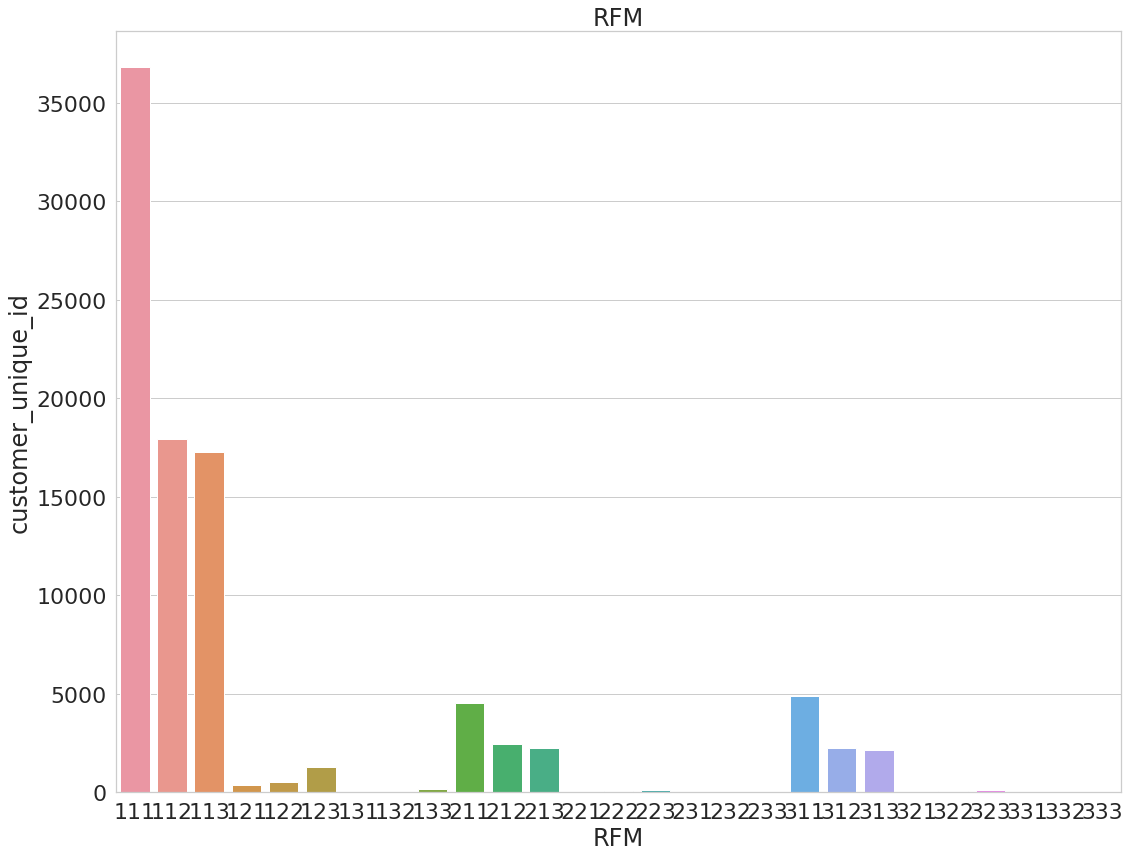

In [81]:
plt.figure(figsize=(18,14))
plt.title('RFM')
sns.barplot(data = RFM_results , x='RFM', y= 'customer_unique_id')

In [82]:
RFM_results = RFM_results.rename(columns={'customer_unique_id':'count'}) \
    .sort_values('count',ascending=False)
RFM_results['percent'] = round((RFM_results['count'] * 100) / RFM_results['count'].sum(),2).astype(str) +' %'
RFM_results

RFM  count  percent
0   111  36797  39.41 %
1   112  17950  19.23 %
2   113  17273   18.5 %
18  311   4907   5.26 %
9   211   4539   4.86 %
10  212   2432   2.61 %
19  312   2260   2.42 %
11  213   2234   2.39 %
20  313   2165   2.32 %
5   123   1269   1.36 %
4   122    525   0.56 %
3   121    378    0.4 %
8   133    157   0.17 %
14  223    126   0.13 %
23  323    107   0.11 %
22  322     52   0.06 %
13  222     49   0.05 %
12  221     36   0.04 %
7   132     32   0.03 %
21  321     31   0.03 %
26  333     13   0.01 %
6   131     12   0.01 %
17  233      9   0.01 %
24  331      2    0.0 %
16  232      1    0.0 %
15  231      1    0.0 %
25  332      1    0.0 %

In [ ]:
Немного информации о значения RFM:
Аббревиатура RFM расшифровывается:
- Recency — давность (как давно ваши пользователи что-то у вас покупали);
- Frequency — частота (как часто они у вас покупают);
- Monetary — деньги (общая сумма покупок).
По давности заказа (recency):
1 — давние клиенты;
2 — относительно недавние клиенты;
3 — недавние клиенты.
По частоте покупок (frequency):
1 — покупает очень редко (единичные заказы);
2 — покупает нечасто;
3 — покупает часто.
По сумме покупок (monetary):
1 — маленькая сумма;
2 — средняя сумма;
3 — большая сумма.
Например, пользователь «111» покупал давно, один раз и на маленькую сумму. Так себе клиент, иным словом. Или пользователь «333»: покупает часто, на большую сумму и последняя покупка была недавно. Это наши лучшие клиенты.
Основная доля клиентов состоит в группе RFM 111 ( последняя покупка более 100 дней назад, кол-во покупок = 1, суммарный объем покупки менее 89.73) Мы имеем дело с минимальными показателями retention, и невысоким средним чеком.) Это почти 40 % наших клиентов. Клиенты RFM 333 составляет около 0.01 %